In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/Users/admin/.pyenv/versions/anaconda3-2.4.0/envs/tensorFlow/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
x = tf.placeholder(tf.float32,[None, 5])

In [3]:
w = tf.Variable(tf.zeros([5,1]))

In [4]:
y = tf.matmul(x, w)

In [5]:
t = tf.placeholder(tf.float32, [None, 1])

In [6]:
loss = tf.reduce_sum(tf.square(y-t))

In [7]:
train_step = tf.train.AdamOptimizer().minimize(loss)

In [11]:
sess = tf.Session()
# sess.run(tf.initialize_all_variables())
sess.run(tf.global_variables_initializer())

In [12]:
train_t = np.array([5.2, 5.7, 8.6, 14.9, 18.2, 20.4, 25.5, 26.4, 22.8, 17.5, 11.1, 6.6])
train_t = train_t.reshape([12,1])

train_x = np.zeros([12,5])
for row, month in enumerate(range(1, 13)):
    for col, n in enumerate(range(0,5)):
        train_x[row][col] = month**n

In [16]:
i = 0
for _ in range(100000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 10000 == 0:
        loss_val = sess.run(loss, feed_dict={x:train_x, t:train_t})
        print('step: %d, loss: %f' % (i, loss_val))

step: 10000, loss: 29.290693
step: 20000, loss: 28.022751
step: 30000, loss: 27.663746
step: 40000, loss: 25.792316
step: 50000, loss: 24.766474
step: 60000, loss: 23.838539
step: 70000, loss: 22.974419
step: 80000, loss: 22.176279
step: 90000, loss: 22.416885
step: 100000, loss: 20.752411


In [17]:
for _ in range(100000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 10000 == 0:
        loss_val = sess.run(loss, feed_dict={x:train_x, t:train_t})
        print('step: %d, loss: %f' % (i, loss_val))

step: 110000, loss: 20.116020
step: 120000, loss: 22.806179
step: 130000, loss: 22.287575
step: 140000, loss: 18.477936
step: 150000, loss: 18.011114
step: 160000, loss: 17.577477
step: 170000, loss: 19.282192
step: 180000, loss: 16.803900
step: 190000, loss: 16.459364
step: 200000, loss: 16.142279


In [18]:
w_val = sess.run(w)
print (w_val)

[[ 6.29650879]
 [-4.24134874]
 [ 2.56947851]
 [-0.28822911]
 [ 0.00859242]]


In [19]:
def predict(x):
    result = 0.0
    for n in range(0, 5):
        result += w_val[n][0] * x**n
    return result

In [22]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim(1,12)
subplot.scatter(range(1,13), train_t)
linex = np.linspace(1,12,100)
liney = predict(linex)
subplot.plot(linex, liney)

/Users/admin/.pyenv/versions/anaconda3-2.4.0/envs/tensorFlow/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


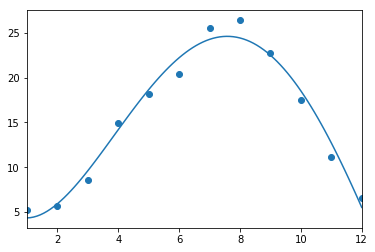

In [24]:
fig